# Collecting the plots

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Potential energy curve

In [12]:
GL_00 = pd.read_csv('outputs/Energy_profile_00_GL.txt',sep='\s+',header=None)
GL_00 = pd.DataFrame(GL_00)
PZ_00 = pd.read_csv('outputs/Energy_profile_00_PZ.txt',sep='\s+',header=None)
PZ_00 = pd.DataFrame(PZ_00)
PW_00 = pd.read_csv('outputs/Energy_profile_00_PW.txt',sep='\s+',header=None)
PW_00 = pd.DataFrame(PW_00)
HF = pd.read_csv('outputs/Energy_profile_HF.txt',sep='\s+',header=None)
HF = pd.DataFrame(HF)

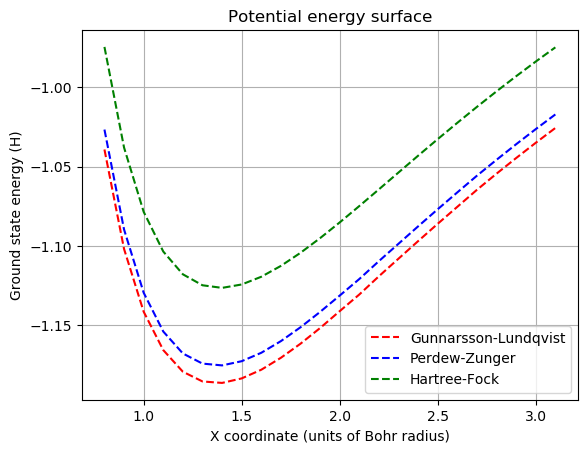

In [20]:
plt.plot(GL_00[0], GL_00[1],'r--', label='Gunnarsson-Lundqvist')
plt.plot(PZ_00[0], PZ_00[1],'b--', label='Perdew-Zunger')
plt.plot(HF[0], HF[1],'g--', label='Hartree-Fock')
plt.grid()
plt.title('Potential energy surface')
plt.xlabel('X coordinate (units of Bohr radius)')
plt.ylabel('Ground state energy (H)')
plt.legend(loc="best")
plt.savefig("outputs/pics/PES.png")

In [17]:
GL_01 = pd.read_csv('outputs/Energy_profile_01_GL.txt',sep='\s+',header=None)
GL_01 = pd.DataFrame(GL_01)
PZ_02 = pd.read_csv('outputs/Energy_profile_02_PZ.txt',sep='\s+',header=None)
PZ_02 = pd.DataFrame(PZ_02)

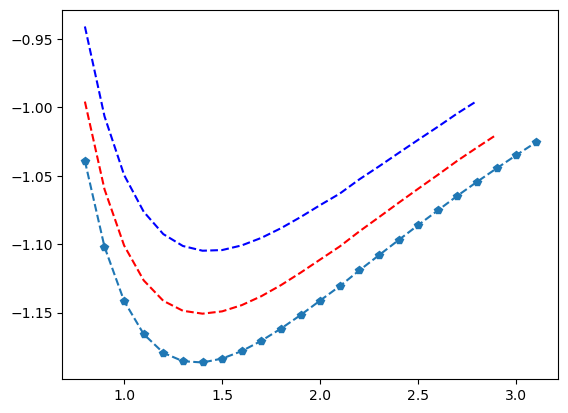

In [19]:
plt.plot(GL_00[0], GL_00[1],'p--', label='Gunnarsson-Lundqvist')
plt.plot(GL_01[0], GL_01[1],'r--', label='Gunnarsson-Lundqvist')
plt.plot(PZ_02[0], PZ_02[1],'b--', label='Perdew-Zunger')

# Ensemble of trajectories

In [16]:

main_dataframe = pd.DataFrame(pd.read_csv(f'outputs/HF_traj/CPMD_HF_0.txt', sep='\s+',header=None))

for i in range(1, 20):
    df = pd.read_csv(f'outputs/HF_traj/CPMD_HF_{i}.txt', sep='\s+',header=None)
    df = pd.DataFrame(df)
    main_dataframe = pd.concat([main_dataframe, df],axis=1)


In [17]:
main_dataframe[0]

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.37577,1.39701,1.13973,1.39449,1.12172,1.206890,1.65767,1.37547,1.89804,1.28664,1.89894,1.12304,1.62102,1.22654,1.86026,1.71627,1.96897,1.65775,1.66880,1.71664
1,1.38362,1.40770,1.12288,1.30563,1.20713,1.116010,1.64563,1.40079,1.84916,1.31604,1.88316,1.23921,1.62452,1.22375,1.84935,1.69709,1.95144,1.72549,1.65829,1.74287
2,1.39125,1.41787,1.10992,1.22056,1.29150,1.031710,1.63265,1.42514,1.80012,1.34504,1.86605,1.35285,1.62664,1.22274,1.83698,1.67707,1.93254,1.78932,1.64677,1.76656
3,1.39859,1.42747,1.10098,1.14017,1.37384,0.955694,1.61883,1.44837,1.75104,1.37340,1.84766,1.46286,1.62740,1.22347,1.82323,1.65630,1.91235,1.84922,1.63429,1.78777
4,1.40560,1.43645,1.09609,1.06553,1.45344,0.890039,1.60423,1.47038,1.70200,1.40090,1.82808,1.56855,1.62685,1.22587,1.80816,1.63486,1.89093,1.90523,1.62094,1.80653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,1.38809,1.38809,1.38809,1.38809,1.38809,1.388090,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809
794,1.38809,1.38809,1.38809,1.38809,1.38809,1.388090,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809
795,1.38809,1.38809,1.38809,1.38809,1.38809,1.388090,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809
796,1.38809,1.38809,1.38809,1.38809,1.38809,1.388090,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809,1.38809


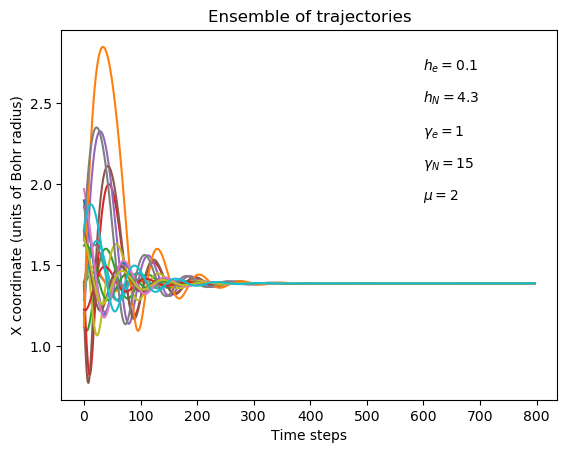

In [26]:
plt.plot(main_dataframe[0])
plt.title('Ensemble of trajectories')
plt.xlabel('Time steps')
plt.ylabel('X coordinate (units of Bohr radius)')
plt.text(600, 2.7, "$h_{e}=0.1$")
plt.text(600, 2.5, "$h_{N}=4.3$")
plt.text(600, 2.3, "$\gamma_{e}=1$")
plt.text(600, 2.1, "$\gamma_{N}=15$")
plt.text(600, 1.9, "$\mu=2$")
plt.savefig("outputs/pics/traj.png")